# Create Prediction Forecast Endpointd
1. Load CSV 
2. Test Pickle
3. Create Prediction Function
4. Create Visualization Function
5. Test Prediction and Visualization Function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

/Users/jisha/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1. Load CSV

In [2]:
population_melt = pd.read_csv('https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_melt.csv')
population = pd.read_csv('https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_cleaned.csv')

## 3. Create Prediction and Visualization Function

In [3]:
def population_forecast(city, periods):
    # Load Dataset
  population = pd.read_csv('https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_cleaned.csv')
  population.reset_index(level=0, inplace=True)

  # Melt table into ds and y
  population_melt = population[['City,State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
  population_melt = population_melt.melt(id_vars=['City,State'], var_name='ds', value_name='y')

  # Isolate city data
  city = [city]
  df_ = population_melt.loc[population_melt['City,State'].isin(city)][['ds', 'y']]
  df_.columns = ['ds','y']

  # Fit and Predict on city dataframe
  m = Prophet(interval_width=0.95)
  m.fit(df_)
  future = m.make_future_dataframe(periods=periods, freq='Y')
  forecast = m.predict(future)
  predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][9:]
  predictions['ds'] = pd.DatetimeIndex(predictions['ds']).year
  predictions[['yhat', 'yhat_lower', 'yhat_upper']] =  predictions[['yhat', 'yhat_lower', 'yhat_upper']].round()

  # Create graph
  # Graph first 10 years
  df_['ds'] = df_['ds'].astype(int)
  ax = df_.plot(x = 'ds', y = 'y', label='Observed', figsize= (10, 8)) 

  # Graph predictions including the upper and lower bounds
  predictions['ds'] = predictions['ds'].astype(int)
  predictions[['ds', 'yhat']].plot(ax = ax, x = 'ds', y = 'yhat', label = "Forecast") 
  ax.fill_between(predictions['ds'],
                predictions['yhat_lower'],
                predictions['yhat_upper'],
                color='k', 
                alpha=.25)

  ax.set_xlabel('Year')
  ax.set_ylabel('Population')
  plt.title(f"{city[0]} Population" )
  plt.legend()

  return plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


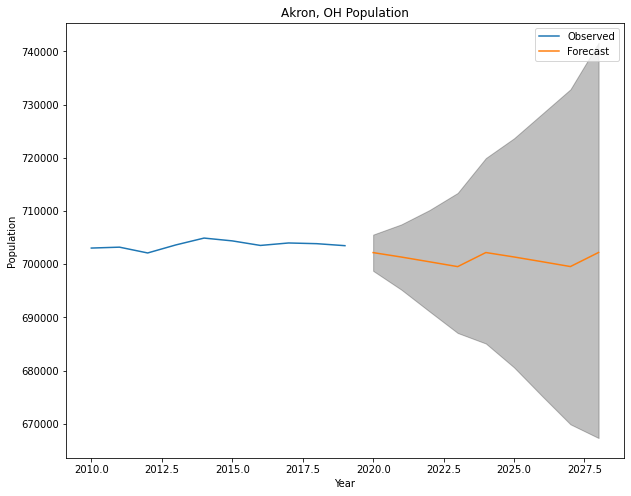

In [4]:
population_forecast('Akron, OH', 10)

## 4. Create Visualization Function
- no pred

In [5]:
POPULATION_CSV = 'https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_cleaned.csv'
FORECAST_CSV = 'https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_prediction.csv'

def get_plot(city):
  city = [city]

  # Historical population data
  population = pd.read_csv(POPULATION_CSV)
  population = population[population['City,State'].isin(city)]
  population = population[['City,State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
  population_melt = population.melt(id_vars=['City,State'], var_name='ds', value_name='y')
  population_melt['ds'] = population_melt['ds'].astype(int)

  # Predictions
  forecast = pd.read_csv(FORECAST_CSV)
  df = forecast[forecast['City,State'].isin(city)][9:]
  df['year'] = df['year'].astype(int)

  # Graph Data
  ax = population_melt.plot(x = 'ds', y = 'y', label='Observed', figsize= (10, 8))
  df[['year', 'yhat']].plot(ax = ax, x = 'year', y = 'yhat', label = "Forecast")

  # Fill to show upper and lower bounds
  ax.fill_between(df['year'],
                df['yhat_lower'],
                df['yhat_upper'],
                color='k', 
                alpha=.25)

  ax.set_xlabel('Year')
  ax.set_ylabel('Population')
  plt.title(f"{city[0]} Population" )
  plt.legend()

  plt.show()

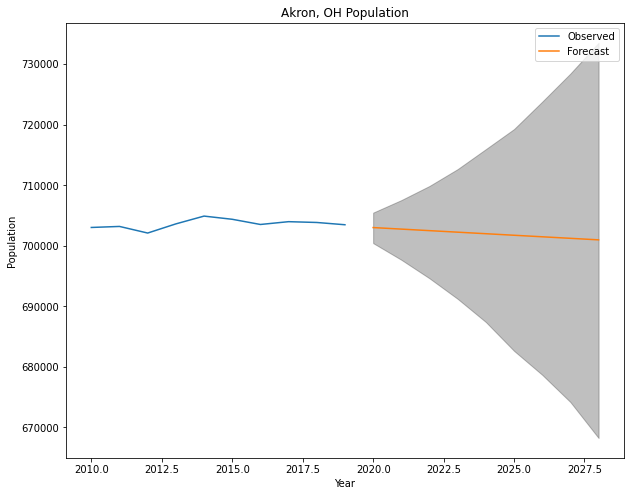

In [6]:
get_plot('Akron, OH')